In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.stats import skew, kurtosis, moment

import numpy as np
from scipy.stats import skew, kurtosis, moment
from scipy.fft import fft, ifft

# Assuming 'x' and 'Fbe' are already defined, and 'Fs' is the sampling frequency
# Make sure 'x' is a numpy array (e.g., x = np.array([...]))

def loychikSD_NP(x, Fs, Fbe):
    # Frequency bin centers
    F = Fbe[:-1] + np.diff(Fbe)

    X = fft(x)
    t = np.arange(0, len(x)) / Fs  # equivalent to the original t calculation
    dF = 1 / t[-1]
    Ff = np.arange(0, len(x)) * dF

    # Statistical moments
    M = np.array([
        np.mean(x),
        np.var(x),
        skew(x),
        kurtosis(x),
        moment(x, 1),
        moment(x, 2),
        moment(x, 3)
    ])

    # Initialize result arrays
    Gx = np.zeros(len(F))
    Sx = np.zeros(len(F))
    Kx = np.zeros(len(F))
    M3x = np.zeros(len(F))
    M4x = np.zeros(len(F))
    
    #Kx = M4x/(Gx)^2

    for ii in range(len(F)):
        if(ii%5==0):
            print(f"{ii + 1} / {len(F)}")  # Counter to determine where you are in run

        # Begin low-pass filter by zeroing bins
        Xn = np.argmax(Ff >= Fbe[ii + 1])  # find the first index where Ff >= Fbe[ii + 1]

        cutX = X[1:Xn]
        XI = np.zeros_like(X)
        XI[1:Xn] = cutX

        # Flipping and conjugating for symmetry
        XI = np.flipud(XI)
        XI[0:Xn - 1] = np.conj(cutX)
        XI = np.flipud(XI)

        xifft = ifft(XI)

        # Extracting the real part of the inverse FFT result
        real_xifft = np.real(xifft)  # this makes sure you're calculating statistics on real numbers

        # Statistical calculations
        Gx[ii] = np.var(real_xifft)
#        Sx[ii] = skew(real_xifft)
#         Kx[ii] = kurtosis(real_xifft)+3
        M3x[ii] = moment(real_xifft, 3)
        M4x[ii] = moment(real_xifft, 4)
        Sx[ii] = M3x[ii]/((Gx[ii]**(1.5))+10**20)
        Kx[ii] = M4x[ii]/((Gx[ii]**2)+10**27)

    return M, F, Gx, Sx, Kx

# The variables Gx, Sx, Kx, M3x, M4x hold the results and can be used as needed



In [2]:
import numpy as np
import scipy.io
import scipy.signal
import scipy.ndimage

# The octspace function is not directly available in Python's standard libraries, you may have to implement it
# Fbe = octspace(10, 6000, 12).center  # Your octave space function
Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
Fbe = Fbe  # Assuming Fbe.center in MATLAB just returns Fbe

## Audio Signal

In [3]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx1, Sx1, Kx1 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx1 = np.gradient(Gx1, F)
# Gxx1.sort()
# Gxx1 = Gxx1[77:]
# Skewness Spectral Density
Sxx1 = np.gradient(Sx1, F)
# Sxx1.sort()
# Sxx1 = Sxx1[77:]
# Kurtosis Spectral Density
Kxx1 = np.gradient(Kx1, F)
# Kxx1.sort()
# Kxx1 = Kxx1[77:]

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx1": Gx1, "Sx1": Sx1, "Kx1": Kx1})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_60313/261350196.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


In [4]:
Kx1

array([5.60058350e-06, 1.54637519e-05, 2.43254956e-05, 2.53206092e-05,
       2.65288209e-05, 2.73690707e-05, 3.07537848e-05, 3.34478800e-05,
       5.72930714e-05, 8.56097999e-05, 1.19582105e-04, 1.31011676e-04,
       2.65013669e-04, 1.07437342e-03, 5.52268304e-03, 8.94704505e-03,
       9.12163628e-03, 9.13552244e-03, 9.14874612e-03, 9.18793571e-03,
       9.25262441e-03, 9.31006336e-03, 9.35224203e-03, 9.43759639e-03,
       9.45238528e-03, 9.69583268e-03, 9.88879397e-03, 9.96176025e-03,
       9.98494364e-03, 9.98933629e-03, 1.00014337e-02, 9.99638288e-03,
       1.00225630e-02, 1.00429684e-02, 1.00403961e-02, 1.00457339e-02,
       1.00419054e-02, 1.00472400e-02, 1.00502193e-02, 1.00530146e-02,
       1.00576254e-02, 1.00612731e-02, 1.00653887e-02, 1.00661888e-02,
       1.00666467e-02, 1.00675097e-02, 1.00695081e-02, 1.00730718e-02,
       1.01754762e-02, 2.36428749e+00, 1.93876042e+00, 1.93868602e+00,
       1.93868485e+00, 1.93868487e+00, 1.93868459e+00, 1.93868418e+00,
      

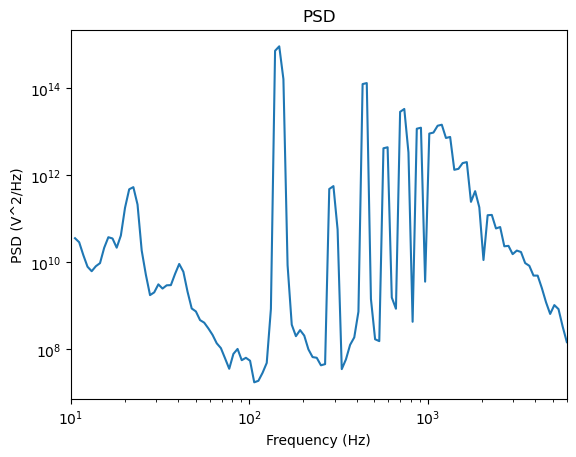

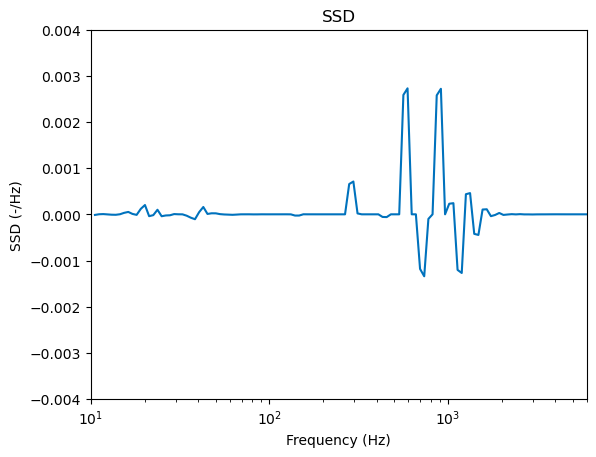

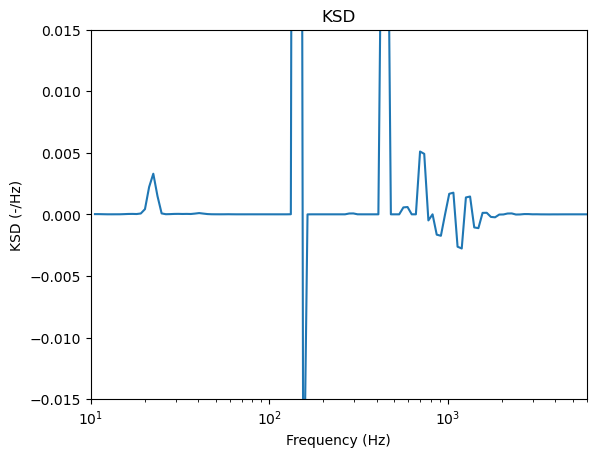

In [5]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 6000])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 6000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 6000])
plt.ylim([-.015, .015])

plt.show()

In [6]:
Kx1

array([5.60058350e-06, 1.54637519e-05, 2.43254956e-05, 2.53206092e-05,
       2.65288209e-05, 2.73690707e-05, 3.07537848e-05, 3.34478800e-05,
       5.72930714e-05, 8.56097999e-05, 1.19582105e-04, 1.31011676e-04,
       2.65013669e-04, 1.07437342e-03, 5.52268304e-03, 8.94704505e-03,
       9.12163628e-03, 9.13552244e-03, 9.14874612e-03, 9.18793571e-03,
       9.25262441e-03, 9.31006336e-03, 9.35224203e-03, 9.43759639e-03,
       9.45238528e-03, 9.69583268e-03, 9.88879397e-03, 9.96176025e-03,
       9.98494364e-03, 9.98933629e-03, 1.00014337e-02, 9.99638288e-03,
       1.00225630e-02, 1.00429684e-02, 1.00403961e-02, 1.00457339e-02,
       1.00419054e-02, 1.00472400e-02, 1.00502193e-02, 1.00530146e-02,
       1.00576254e-02, 1.00612731e-02, 1.00653887e-02, 1.00661888e-02,
       1.00666467e-02, 1.00675097e-02, 1.00695081e-02, 1.00730718e-02,
       1.01754762e-02, 2.36428749e+00, 1.93876042e+00, 1.93868602e+00,
       1.93868485e+00, 1.93868487e+00, 1.93868459e+00, 1.93868418e+00,
      

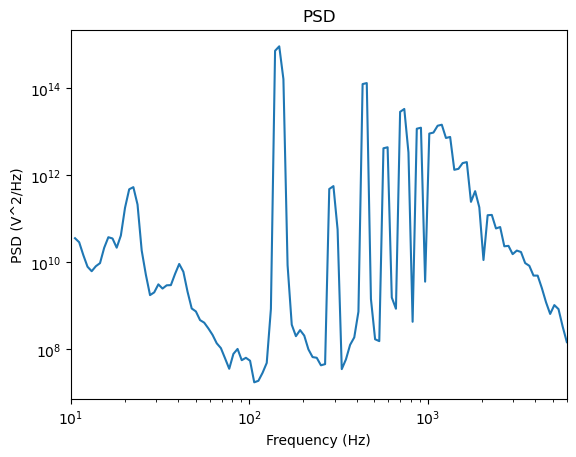

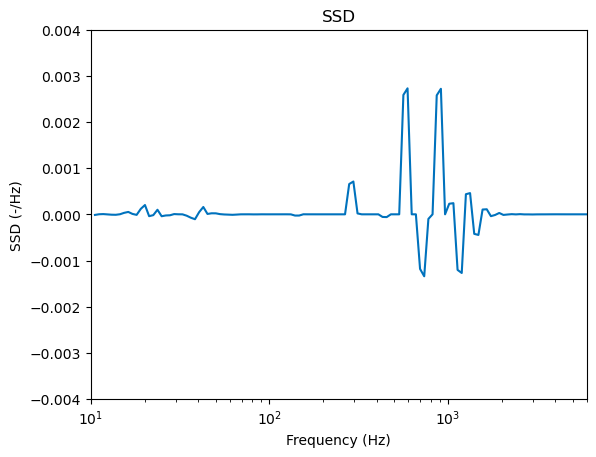

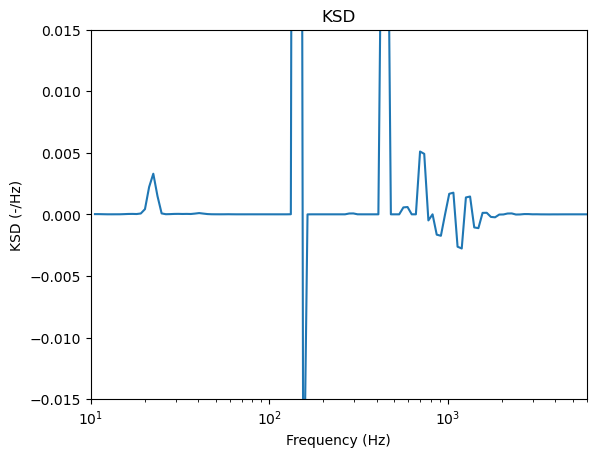

In [7]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 6000])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 6000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 6000])
plt.ylim([-.015, .015])

plt.show()

In [8]:
indices = np.where((F >= 100) & (F <= 1400))

# Using the indices to extract the corresponding PSD values
selected_PSD_values = Gxx1[indices]
selected_PSD_values

array([5.35162473e+07, 1.70457929e+07, 1.84776635e+07, 2.82104378e+07,
       4.76749048e+07, 8.32904116e+08, 7.23130979e+14, 9.15883718e+14,
       1.61264771e+14, 8.44044825e+09, 3.61083514e+08, 1.96525521e+08,
       2.70847448e+08, 2.02446732e+08, 9.76217100e+07, 6.48905741e+07,
       6.25392494e+07, 4.19815623e+07, 4.46846166e+07, 4.77548732e+11,
       5.57040178e+11, 5.60978074e+10, 3.42780363e+07, 5.73873770e+07,
       1.23924399e+08, 1.84448635e+08, 7.20665499e+08, 1.23930057e+14,
       1.30774878e+14, 1.40665646e+09, 1.66840556e+08, 1.51244788e+08,
       4.13141274e+12, 4.36068450e+12, 1.52313783e+09, 8.40202148e+08,
       2.84625582e+13, 3.31730661e+13, 3.31275243e+12, 4.21386405e+08,
       1.16427042e+13, 1.22871438e+13, 3.52804901e+09, 9.00455422e+12,
       9.50074975e+12, 1.36373161e+13, 1.43908836e+13, 7.13148774e+12,
       7.52845245e+12])

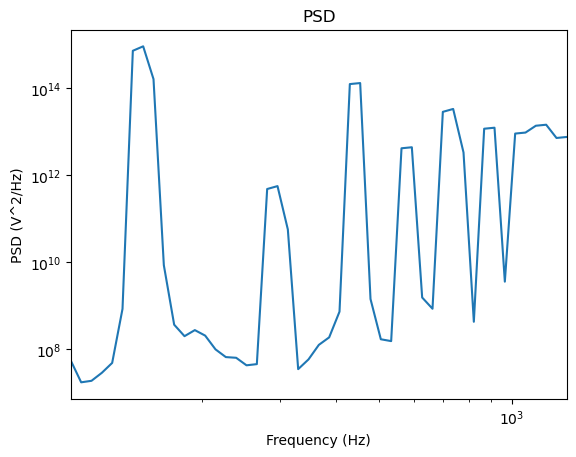

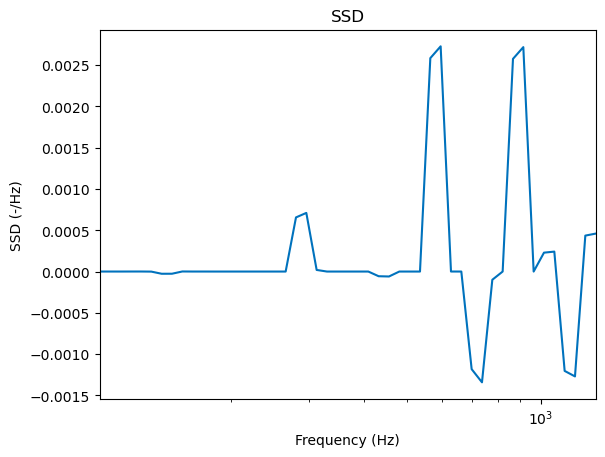

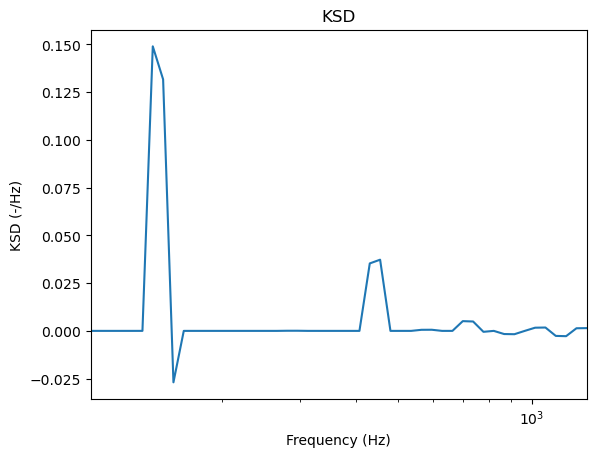

In [9]:
plt.figure(3)
plt.loglog(F[indices], selected_PSD_values, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim(min(F[indices]),max(F[indices]))

plt.figure(4)
plt.semilogx(F[indices], Sxx1[indices], linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim(min(F[indices]),max(F[indices]))

plt.figure(5)
plt.semilogx(F[indices], Kxx1[indices], linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim(min(F[indices]),max(F[indices]))

plt.show()

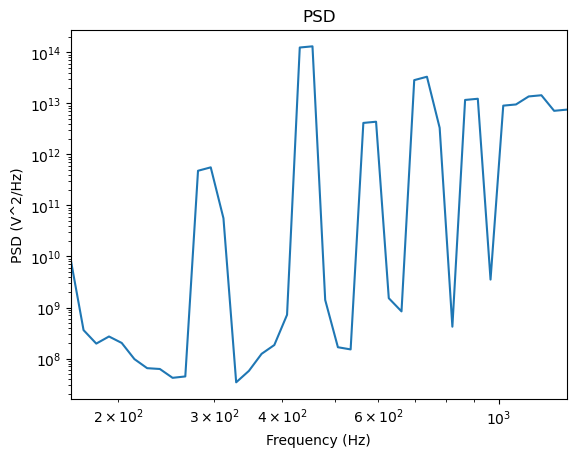

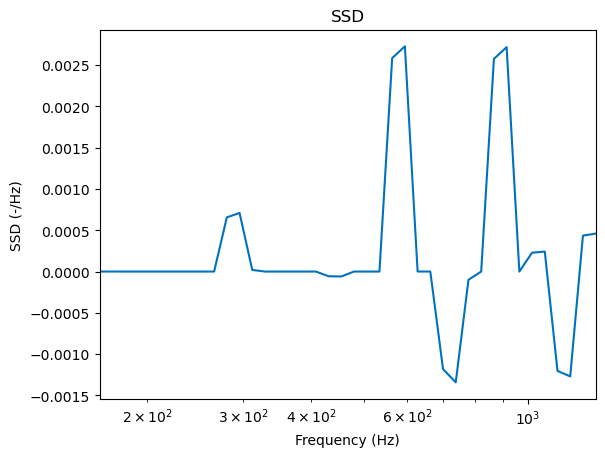

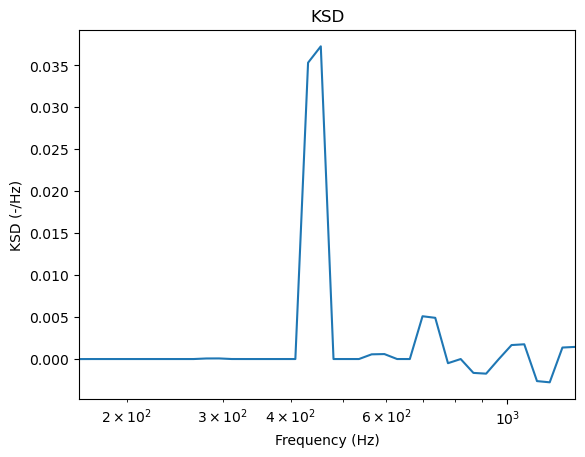

In [20]:
middle_c_freq = 261.63
tolerance = 5 
middle_c_peak = np.where((F > middle_c_freq - 100) & (F < middle_c_freq + 1100))
# Using the indices to extract the corresponding PSD values
selected_PSD_values = Gxx1[middle_c_peak]
plt.figure(3)
plt.loglog(F[middle_c_peak], selected_PSD_values, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim(min(F[middle_c_peak]),max(F[middle_c_peak]))

plt.figure(4)
plt.semilogx(F[middle_c_peak], Sxx1[middle_c_peak], linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim(min(F[middle_c_peak]),max(F[middle_c_peak]))

plt.figure(5)
plt.semilogx(F[middle_c_peak], Kxx1[middle_c_peak], linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim(min(F[middle_c_peak]),max(F[middle_c_peak]))

plt.show()

In [21]:
Gx1[middle_c_peak]

array([1.39850210e+16, 1.39850264e+16, 1.39850275e+16, 1.39850303e+16,
       1.39850331e+16, 1.39850347e+16, 1.39850353e+16, 1.39850363e+16,
       1.39850368e+16, 1.39850374e+16, 1.39850381e+16, 1.40002242e+16,
       1.40020076e+16, 1.40020082e+16, 1.40020088e+16, 1.40020104e+16,
       1.40020138e+16, 1.40020182e+16, 1.40020466e+16, 2.00609015e+16,
       2.00609659e+16, 2.00609708e+16, 2.00609749e+16, 2.00609795e+16,
       2.03252419e+16, 2.03253224e+16, 2.03253413e+16, 2.03253834e+16,
       2.25827046e+16, 2.28454277e+16, 2.28454406e+16, 2.28454655e+16,
       2.39903325e+16, 2.39905139e+16, 2.39906982e+16, 2.50309193e+16,
       2.50310141e+16, 2.67854743e+16, 2.67856492e+16, 2.78071288e+16])

Text(0, 0.5, 'Gx (-/Hz)')

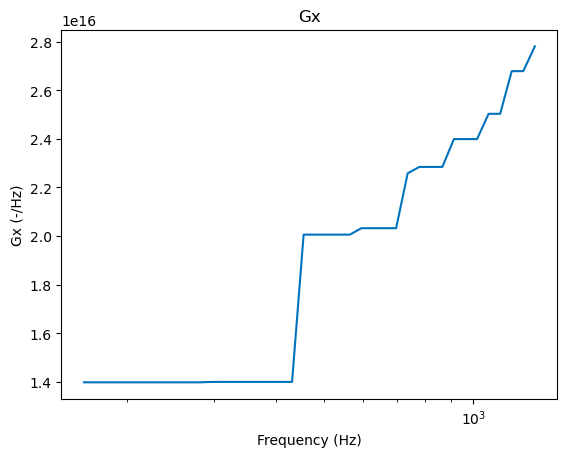

In [25]:
plt.figure(4)
plt.semilogx(F[middle_c_peak], Gx1[middle_c_peak], linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('Gx')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gx (-/Hz)')

## Observing on mixture instruments

In [10]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx1, Sx1, Kx1 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx1 = np.gradient(Gx1, F)
# Skewness Spectral Density
Sxx1 = np.gradient(Sx1, F)

# Kurtosis Spectral Density
Kxx1 = np.gradient(Kx1, F)


# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx1": Gx1, "Sx1": Sx1, "Kx1": Kx1})

print("MAT file saved. Mission accomplished.")

/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_60313/4095574762.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


In [3]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx2, Sx2, Kx2 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx2 = np.gradient(Gx2, F)

# Skewness Spectral Density
Sxx2 = np.gradient(Sx2, F)

# Kurtosis Spectral Density
Kxx2 = np.gradient(Kx2, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx2": Gx2, "Sx2": Sx2, "Kx2": Kx2})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_8712/2254533305.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_reference/neumann/0000.wav")


1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


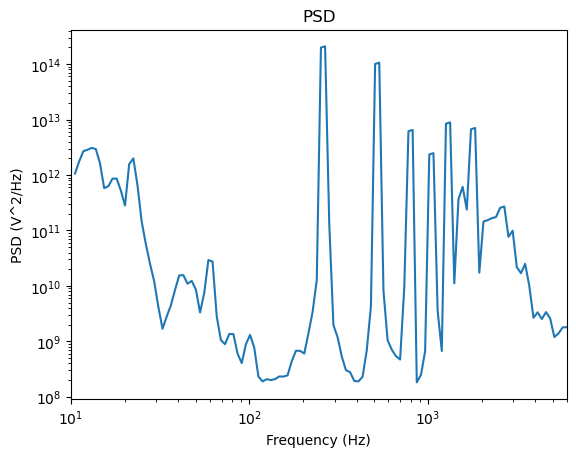

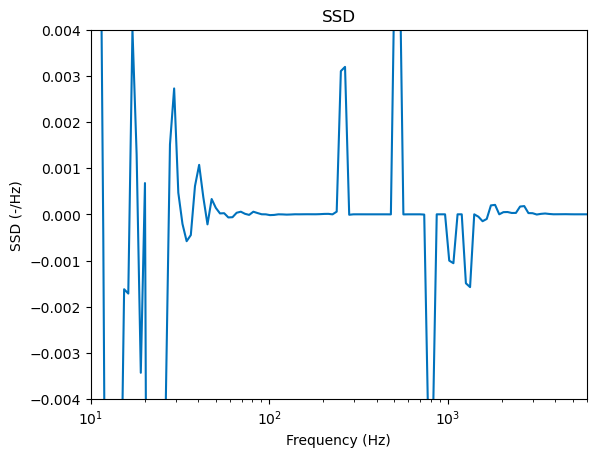

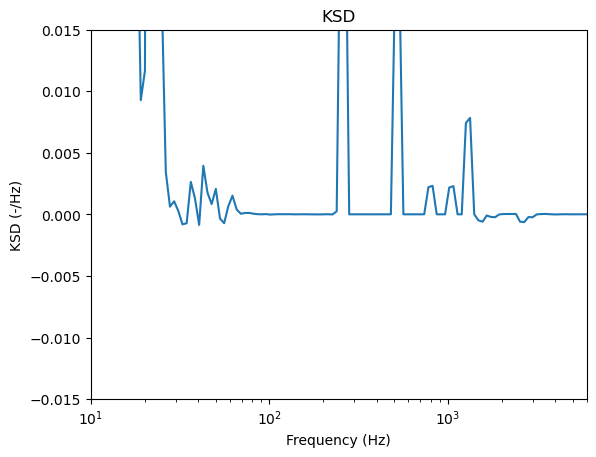

In [4]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

plt.figure(3)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 6000])

plt.figure(4)
plt.semilogx(F, Sxx2, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 6000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx2, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 6000])
plt.ylim([-.015, .015])

plt.show()

In [12]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx3, Sx3, Kx3 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx3 = np.gradient(Gx3, F)

# Skewness Spectral Density
Sxx3 = np.gradient(Sx3, F)

# Kurtosis Spectral Density
Kxx3 = np.gradient(Kx3, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx3": Gx3, "Sx3": Sx3, "Kx3": Kx3})

print("MAT file saved. Mission accomplished.")




1 / 119
6 / 119


/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_60313/3016339365.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_reference/neumann/0000.wav")


11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


In [13]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_reference/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx4, Sx4, Kx4 = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx4 = np.gradient(Gx4, F)

# Skewness Spectral Density
Sxx4 = np.gradient(Sx4, F)

# Kurtosis Spectral Density
Kxx4 = np.gradient(Kx4, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx4": Gx4, "Sx4": Sx4, "Kx4": Kx4})

print("MAT file saved. Mission accomplished.")




1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119


/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_60313/3301658376.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_reference/neumann/0000.wav")


56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
MAT file saved. Mission accomplished.


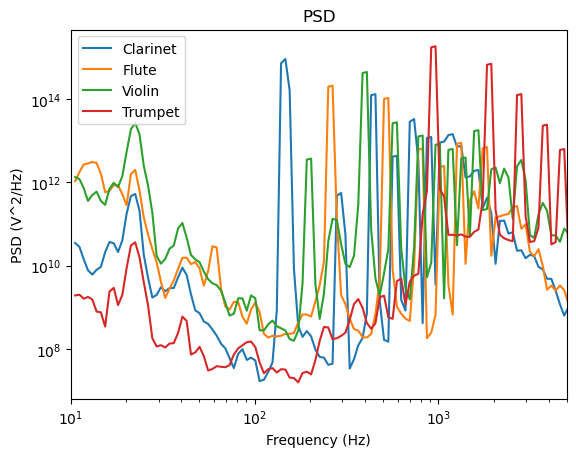

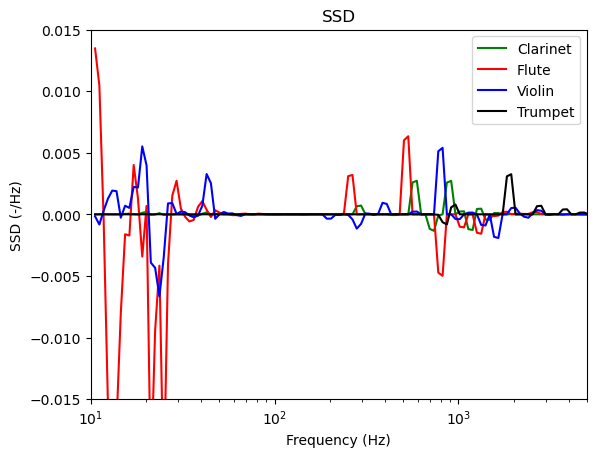

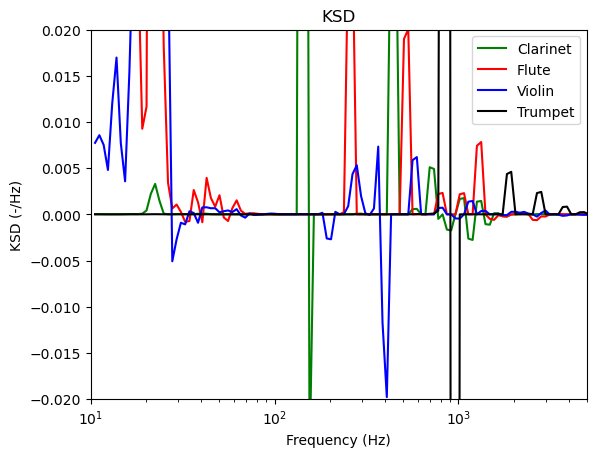

In [14]:
plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.loglog(F, Gxx4, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5,color='green',label="Clarinet")
plt.semilogx(F, Sxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Sxx3, linewidth=1.5,color='blue',label="Violin")
plt.semilogx(F, Sxx4, linewidth=1.5,color='black',label="Trumpet")

plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.show()
plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5,color='green',label="Clarient")
plt.semilogx(F, Kxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Kxx3, linewidth=1.5,color='blue',label="Violin")
plt.semilogx(F, Kxx4, linewidth=1.5,color='black',label="Trumpet")

plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.020, .020])
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.show()

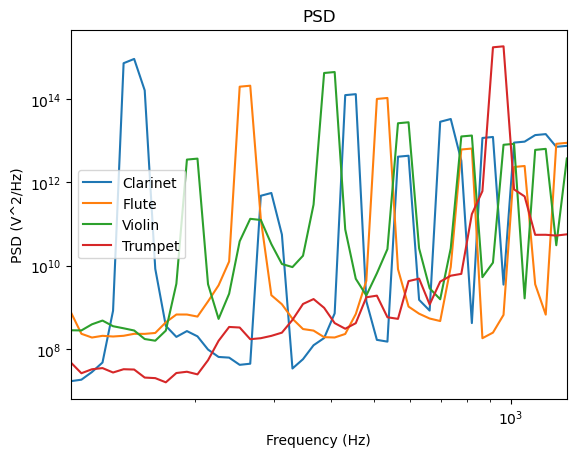

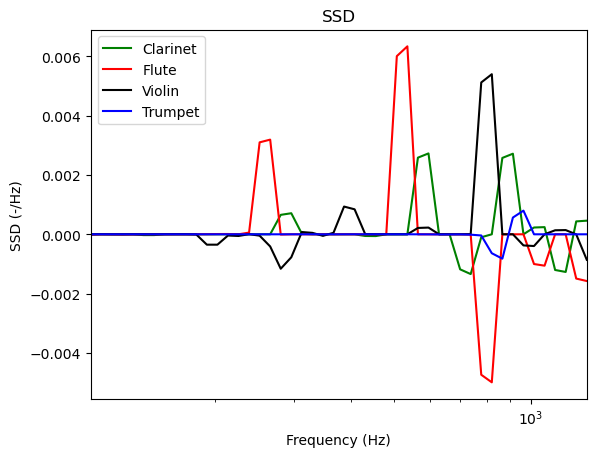

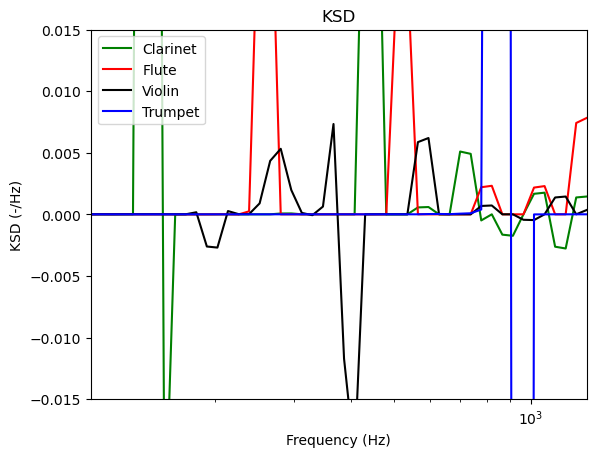

In [15]:
plt.figure(3)

middle_c_freq = 261.63
tolerance = 5 
middle_c_peak = np.where((F > middle_c_freq - 160) & (F < middle_c_freq + 1100))

# Using the indices to extract the corresponding PSD values
selected_PSD_values1 = Gxx1[middle_c_peak]
selected_PSD_values2 = Gxx2[middle_c_peak]
selected_PSD_values3 = Gxx3[middle_c_peak]
selected_PSD_values4 = Gxx4[middle_c_peak]

plt.loglog(F[middle_c_peak], selected_PSD_values1, linewidth=1.5)
plt.loglog(F[middle_c_peak], selected_PSD_values2, linewidth=1.5)
plt.loglog(F[middle_c_peak], selected_PSD_values3, linewidth=1.5)
plt.loglog(F[middle_c_peak], selected_PSD_values4, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim(min(F[middle_c_peak]),max(F[middle_c_peak]))
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.figure(4)
plt.semilogx(F[middle_c_peak], Sxx1[middle_c_peak], linewidth=1.5,color='green',label="Clarinet")
plt.semilogx(F[middle_c_peak], Sxx2[middle_c_peak], linewidth=1.5,color='red',label="Flute")
plt.semilogx(F[middle_c_peak], Sxx3[middle_c_peak], linewidth=1.5,color='black',label="violin")
plt.semilogx(F[middle_c_peak], Sxx4[middle_c_peak], linewidth=1.5,color='blue',label="Trumpet")

plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim(min(F[middle_c_peak]),max(F[middle_c_peak]))
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])

plt.show()
plt.figure(5)
plt.semilogx(F[middle_c_peak], Kxx1[middle_c_peak], linewidth=1.5,color='green',label="Clarinet")
plt.semilogx(F[middle_c_peak], Kxx2[middle_c_peak], linewidth=1.5,color='red',label="Flute")
plt.semilogx(F[middle_c_peak], Kxx3[middle_c_peak], linewidth=1.5,color='black',label="Violin")
plt.semilogx(F[middle_c_peak], Kxx4[middle_c_peak], linewidth=1.5,color='blue',label="Trumpet")

plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim(min(F[middle_c_peak]),max(F[middle_c_peak]))
plt.legend(labels=["Clarinet", "Flute","Violin","Trumpet"])
plt.ylim([-.015, .015])
plt.show()

In [99]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np
import os

from scipy.io import wavfile

# instruments = ['flute_almudena_stability','violin_raquel_richness','clarinet_pablo_richness','trumpet_ramon_pitch_stability']
instruments = ['cello_margarita_pitch_stability','violin_raquel_pitch_stability','clarinet_pablo_pitch_stability']

# Read audio file
# filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann"


In [100]:
filelist = []
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"
for i in instruments:
    filetemp = filepath+i+'/'+'neumann'
    counter = 0
    for filename in os.listdir(filetemp):
        if filename.endswith('.wav'):
            filelist.append(filename)
            counter+=1
    print(counter)
len(filelist)

62
72
91


225

In [101]:
Gxx1 

array([3.52311427e+10, 2.84672032e+10, 1.43591870e+10, 7.78721745e+09,
       6.13373190e+09, 7.99221399e+09, 9.41530415e+09, 2.11950088e+10,
       3.71554516e+10, 3.47250682e+10, 2.13393384e+10, 4.05945038e+10,
       1.76966695e+11, 4.70669971e+11, 5.27399589e+11, 2.09998056e+11,
       1.83828896e+10, 5.09783885e+09, 1.72995133e+09, 1.99909088e+09,
       3.05838445e+09, 2.44660541e+09, 2.90784273e+09, 2.93547721e+09,
       5.30677529e+09, 9.01251631e+09, 5.95857163e+09, 2.07130636e+09,
       8.52113250e+08, 7.28641160e+08, 4.60763517e+08, 4.01646775e+08,
       2.95856100e+08, 2.10374341e+08, 1.34835001e+08, 1.04393368e+08,
       6.07284080e+07, 3.49556531e+07, 7.67623711e+07, 9.99497598e+07,
       5.50474558e+07, 6.24943028e+07, 5.35162473e+07, 1.70457929e+07,
       1.84776635e+07, 2.82104378e+07, 4.76749048e+07, 8.32904116e+08,
       7.23130979e+14, 9.15883718e+14, 1.61264771e+14, 8.44044825e+09,
       3.61083514e+08, 1.96525521e+08, 2.70847448e+08, 2.02446732e+08,
      

In [102]:
len(Gxx1)

119

In [103]:
len(middle_c_peak[0])

48

In [104]:
Gxx1 = Gxx1[np.where((F > middle_c_freq - 160) & (F < middle_c_freq + 1100))]
len(Gxx1)

48

In [105]:
len(Gxx2[middle_c_peak[0]])

48

In [125]:
audio_data = []

import scipy.io
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

# explore the data size from 12 to 120 ?

Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"

from scipy.io import wavfile

import os
for i,file in enumerate(instruments):
    fp = filepath+''+file+'/neumann/'
    print(fp)
    arr = [fp + x for x in os.listdir(fp) if x.endswith('.wav')]
    print(arr)
    for j,f in enumerate(arr):
        print(f)
        with open(f, 'rb') as wf:
            Fs, audio_data = wavfile.read(wf)
        x3 = audio_data.astype(float)

        M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

        # Power Spectral Density
        Gxx = np.gradient(Gx, F)

        # Skewness Spectral Density
        Sxx = np.gradient(Sx, F)

        # Kurtosis Spectral Density
        Kxx = np.gradient(Kx, F)

        # Fourth Central Moment Spectral Density
        # M4xx = np.gradient(Kx * Gx ** 2, F)

        # Clear variables
        # del x, x2, x3

        # Save variables
        # Specify the filename
        output_path = '/Users/karthikkurella/Documents/Audio_mat/'
        filename = f"{file.split('_')[0]}-{j+1}.mat"

        mat_data = {
        "M": M,
        "F": F,
        "Gx": Gx,
        "Sx": Sx,
        "Kx": Kx,
        "Gxx":Gxx,
        "Sxx":Sxx,
        "Kxx":Kxx
        }

        # Save the dictionary into a .mat file
        scipy.io.savemat(output_path+filename, mat_data)

        print(f"Saved {filename}")

/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/
['/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0010.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0004.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0038.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0039.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0005.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0011.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0007.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0013.wav', '/Users/karthikkurella/Downloads/good-

/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_40291/3057648122.py:24: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read(wf)


16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0039.wav
1 

16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0048.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0052.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0046.wav

16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-49.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0032.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0033.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved cello-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/cello_margarita_pitch_stability/neumann/0027.wav

11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0039.

21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0059.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0071.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0065.wav
1 / 119
6 /

26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-49.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0043.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0042.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0056.wav
1 / 119
6 / 119
11 /

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stabil

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0070.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0058.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_sta

1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-49.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0045.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0051.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_p

6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-73.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0019.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-74.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_stability/neumann/0018.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved clarinet-75.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/clarinet_pablo_pitch_sta

In [ ]:
audio_data = []

import scipy.io
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

# explore the data size from 12 to 120 ?

Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"

from scipy.io import wavfile

import os
for i,file in enumerate(instruments):
    fp = filepath+''+file+'/neumann/'
    arr = [fp + x for x in os.listdir(fp) if x.endswith('.wav')]
    for j,f in enumerate(arr):
        with open(f, 'rb') as wf:
            Fs, audio_data = wavfile.read(wf)
        x3 = audio_data.astype(float)

        M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

        # Power Spectral Density
        Gxx = np.gradient(Gx, F)
        # Skewness Spectral Density
        Sxx = np.gradient(Sx, F)

        # Kurtosis Spectral Density
        Kxx = np.gradient(Kx, F)
        
        middle_c_freq = 261.63
        tolerance = 5 
        middle_c_peak = np.where((F > middle_c_freq - 160) & (F < middle_c_freq + 1100))
        
        Gx = Gx[middle_c_peak[0]]
        Sx = Sx[middle_c_peak[0]]
        Kx = Kx[middle_c_peak[0]]
        Gxx = Gxx[middle_c_peak[0]]
        Sxx = Sxx[middle_c_peak[0]]
        Kxx = Kxx[middle_c_peak[0]]
        # Fourth Central Moment Spectral Density
        # M4xx = np.gradient(Kx * Gx ** 2, F)

        # Clear variables
        # del x, x2, x3

        # Save variables
        # Specify the filename
        output_path = '/Users/karthikkurella/Documents/Audio_mat/'
        filename = f"{file.split('_')[0]}-{j+1}.mat"

        mat_data = {
        "M": M,
        "F": F,
        "Gx": Gx,
        "Sx": Sx,
        "Kx": Kx,
        "Gxx":Gxx,
        "Sxx":Sxx,
        "Kxx":Kxx
        }

        # Save the dictionary into a .mat file
        scipy.io.savemat(output_path+filename, mat_data)

        print(f"Saved {filename}")

## Multi-processing

In [ ]:
import os
import multiprocessing
from numba import jit
import numpy as np
from scipy.io import wavfile
import scipy.io

# Assuming 'x' and 'Fbe' are already defined, and 'Fs' is the sampling frequency
# Make sure 'x' is a numpy array (e.g., x = np.array([...]))

@jit(nopython=True)
def loychikSD_NP(x, Fs, Fbe):
    # Frequency bin centers
    F = Fbe[:-1] + np.diff(Fbe)

    X = fft(x)
    t = np.arange(0, len(x)) / Fs  # equivalent to the original t calculation
    dF = 1 / t[-1]
    Ff = np.arange(0, len(x)) * dF

    # Statistical moments
    M = np.array([
        np.mean(x),
        np.var(x),
        skew(x),
        kurtosis(x),
        moment(x, 1),
        moment(x, 2),
        moment(x, 3)
    ])

    # Initialize result arrays
    Gx = np.zeros(len(F))
    Sx = np.zeros(len(F))
    Kx = np.zeros(len(F))
    M3x = np.zeros(len(F))
    M4x = np.zeros(len(F))
    
    #Kx = M4x/(Gx)^2

    for ii in range(len(F)):
        if(ii%5==0):
            print(f"{ii + 1} / {len(F)}")  # Counter to determine where you are in run

        # Begin low-pass filter by zeroing bins
        Xn = np.argmax(Ff >= Fbe[ii + 1])  # find the first index where Ff >= Fbe[ii + 1]

        cutX = X[1:Xn]
        XI = np.zeros_like(X)
        XI[1:Xn] = cutX

        # Flipping and conjugating for symmetry
        XI = np.flipud(XI)
        XI[0:Xn - 1] = np.conj(cutX)
        XI = np.flipud(XI)

        xifft = ifft(XI)

        # Extracting the real part of the inverse FFT result
        real_xifft = np.real(xifft)  # this makes sure you're calculating statistics on real numbers

        # Statistical calculations
        Gx[ii] = np.var(real_xifft)
        Sx[ii] = skew(real_xifft)
        Kx[ii] = kurtosis(real_xifft)+3
        M3x[ii] = moment(real_xifft, 3)
        M4x[ii] = moment(real_xifft, 4)

    return M, F, Gx, Sx, Kx

# The variables Gx, Sx, Kx, M3x, M4x hold the results and can be used as needed



In [ ]:
import os
import multiprocessing
from audio_processing import process_audio_file, parallel_process_files
from functools import partial  # Import functools.partial

if __name__ == "__main__":
    # Set the number of CPU cores you want to use for parallel processing
    num_cores = multiprocessing.cpu_count()

    # List of audio files to process
    instruments = ['cello_margarita_pitch_stability', 'violin_raquel_pitch_stability', 'clarinet_pablo_pitch_stability']
    filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"

    file_lists = []
    for instrument in instruments:
        fp = os.path.join(filepath, instrument, 'neumann')
        arr = [os.path.join(fp, x) for x in os.listdir(fp) if x.endswith('.wav')]
        file_lists.append(arr)

    # Use multiprocessing to process files in parallel
    pool = multiprocessing.Pool(processes=num_cores)
    
    # Use the process_with_args function to pass both fp and idx
    pool.map(parallel_process_files, file_lists)
    pool.close()
    pool.join()

    print("Processing completed.")
